In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import sys
import seaborn as sns
from operator import itemgetter
import math
from scipy import stats 
from prettytable import PrettyTable

In [2]:
vdfx = pd.read_csv("../csv/catapult_normals_area.csv")
cdfx = pd.read_csv("../csv/catapult_normals_latency.csv")
li=[]
viv_violin=pd.read_csv("../csv/catapult_normals_area_violin.csv",index_col=None)
li.append(viv_violin)
cat_violin=pd.read_csv("../csv/catapult_normals_latency_violin.csv",index_col=None)
li.append(cat_violin)
violin=pd.concat(li, axis=0, ignore_index=True)
l2=[]
l2.append(violin)
cdfx['throughput'] = cdfx['obj1'].min()*1/cdfx['obj1']
vdfx['throughput'] = cdfx['obj1'].min()*1/vdfx['obj1']
cdfx['ff_inv'] = cdfx['ff'].min()*1/cdfx['ff']
vdfx['ff_inv'] = cdfx['ff'].min()*1/vdfx['ff']
cdfx['lut_inv'] = cdfx['lut'].min()*1/cdfx['lut']
vdfx['lut_inv'] = cdfx['lut'].min()*1/vdfx['lut']
cdfx['1/obj2'] = cdfx['obj2'].min()*1/cdfx['obj2']
vdfx['1/obj2'] = cdfx['obj2'].min()*1/vdfx['obj2']
cdfx['clbUtil'] = cdfx['obj2']/147780
vdfx['clbUtil'] = vdfx['obj2']/147780
# drop columns
cdfx['mem_partition_size'] = cdfx['knob_partition_factor']
vdfx['mem_partition_size'] = vdfx['knob_partition_factor']
cdfx = cdfx.drop(columns=['knob_I_B', 'knob_partition_factor'])
vdfx = vdfx.drop(columns=['knob_I_B', 'knob_partition_factor'])

Text(0.5, 1.0, 'Normals Combined Design Space')

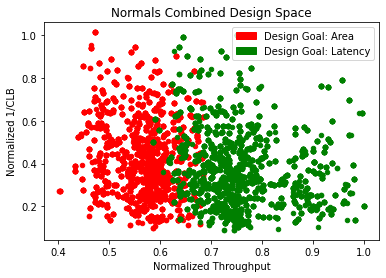

In [3]:
ax1 = vdfx.plot(x='throughput', y='1/obj2', kind='scatter', c='r')
ax = cdfx.plot(x='throughput', y='1/obj2', kind='scatter', c='g', ax=ax1)
#ax1.set_ylim(0,0.016)

red_data = mpatches.Patch(color='red', label='Design Goal: Area')
green_data = mpatches.Patch(color='green', label='Design Goal: Latency')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Normalized Throughput')
plt.ylabel('Normalized 1/CLB')
plt.title("Normals Combined Design Space")

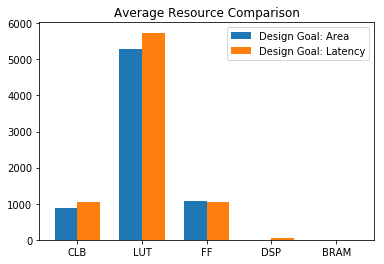

In [3]:
fig, ax = plt.subplots()

N=5
area_val=(vdfx['obj2'].mean(),vdfx['lut'].mean(),vdfx['ff'].mean(),vdfx['dsp'].mean(),vdfx['bram'].mean())
latency_val=(cdfx['obj2'].mean(),cdfx['lut'].mean(),cdfx['ff'].mean(),cdfx['dsp'].mean(),cdfx['bram'].mean())

ind = np.arange(N)
width = 0.35 

p1=ax.bar(ind,area_val,width,label='area')
p2=ax.bar(ind+width,latency_val,width,label='latency')

ax.set_title('Average Resource Comparison')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('CLB', 'LUT', 'FF', 'DSP', 'BRAM'))

ax.legend((p1[0], p2[0]), ('Design Goal: Area', 'Design Goal: Latency'))

ax.autoscale_view()
plt.show()

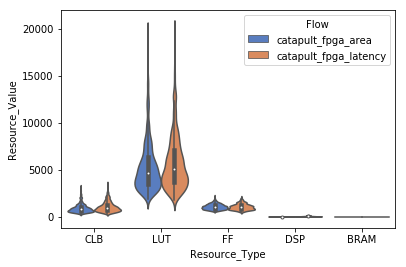

In [4]:
ax = sns.violinplot(x="Resource_Type", y="Resource_Value", hue="Flow",
                    data=violin, palette="muted",
                    scale="count")

0.5658640145645282 0.7567067725094601


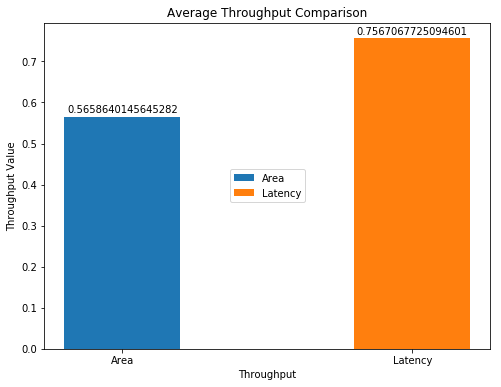

In [5]:
fig, ax = plt.subplots()

N=1
area_val=(vdfx['throughput'].mean())
latency_val=(cdfx['throughput'].mean())
print(area_val,latency_val)
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
fig.set_size_inches(8, 6, forward=True)


ind1=[0,0.025]
width = 0.01 
labels=['Area','Latency']
p1=ax.bar(0,area_val,width,label='Area')
p2=ax.bar(0.025,latency_val,width,label='Latency')

ax.set_title('Average Throughput Comparison')
ax.set_xlabel('Throughput')
ax.set_ylabel('Throughput Value')
ax.set_xticks(ind1)
ax.set_xticklabels(labels)
        
autolabel(p1)
autolabel(p2)
ax.legend((p1[0], p2[0]), ('Area', 'Latency'),loc="center")

ax.autoscale_view()
plt.show()

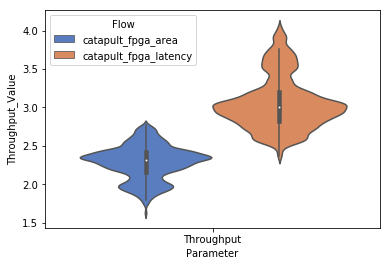

In [6]:


ax=sns.violinplot(x="Parameter",y="Throughput_Value",data=violin,hue="Flow",palette="muted",scale="count")



In [7]:
cdfx = cdfx.reset_index(drop=True)
vdfx = vdfx.reset_index(drop=True)
cv_df = pd.merge(cdfx, vdfx, on=['knob_KNOB_WINDOW_SIZE_X','knob_inner_unroll1','knob_inner_unroll2','knob_outer_unroll','mem_partition_size'], how='inner')

(0, 1)

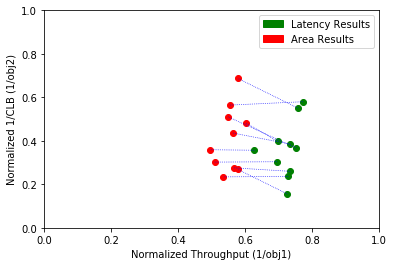

In [8]:
df_sample = cv_df.sample(10)
plt.scatter(y=df_sample['1/obj2_x'], x=df_sample.throughput_x, c='g')
plt.scatter(y=df_sample['1/obj2_y'], x=df_sample.throughput_y, c='r')
linex = []
for index, row in df_sample.iterrows():
    plt.plot([row['throughput_x'], row['throughput_y']], [row['1/obj2_x'], row['1/obj2_y']],'b:',linewidth=0.7)

red_data = mpatches.Patch(color='green', label='Latency Results')
green_data = mpatches.Patch(color='red', label='Area Results')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Normalized Throughput (1/obj1)')
plt.ylabel('Normalized 1/CLB (1/obj2)')
plt.ylim(0, 1)
plt.xlim(0, 1)

(0, 1)

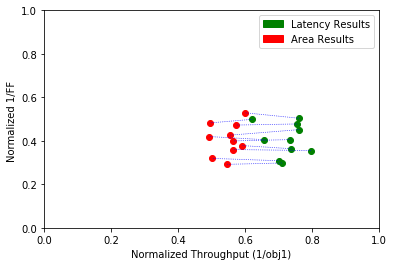

In [9]:
df_sample = cv_df.sample(10)
plt.scatter(y=df_sample['ff_inv_x'], x=df_sample.throughput_x, c='g')
plt.scatter(y=df_sample['ff_inv_y'], x=df_sample.throughput_y, c='r')
linex = []
for index, row in df_sample.iterrows():
    plt.plot([row['throughput_x'], row['throughput_y']], [row['ff_inv_x'], row['ff_inv_y']],'b:',linewidth=0.7)

red_data = mpatches.Patch(color='green', label='Latency Results')
green_data = mpatches.Patch(color='red', label='Area Results')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Normalized Throughput (1/obj1)')
plt.ylabel('Normalized 1/FF ')
plt.ylim(0, 1)
plt.xlim(0, 1)

/home/elakkiap/.local/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: p-value floored: true value smaller than 0.001


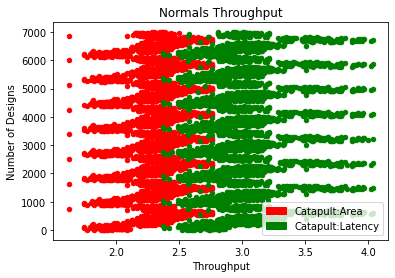

In [4]:
cdfx['throughput'] = 1/cdfx['obj1']
vdfx['throughput'] = 1/vdfx['obj1']
cdfx['area'] = 1/cdfx['obj2']
vdfx['area'] = 1/vdfx['obj2']

#plots
ax1 = vdfx.plot(x='throughput', y='n', kind='scatter', c='r')
ax = cdfx.plot(x='throughput', y='n', kind='scatter', c='g', ax=ax1)
#ax1.set_ylim(0,0.016)

red_data = mpatches.Patch(color='red', label='Catapult:Area')
green_data = mpatches.Patch(color='green', label='Catapult:Latency')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Throughput')
plt.ylabel('Number of Designs')
plt.title("Normals Throughput")

latency_tp = np.array(cdfx['throughput'])
vivado_tp = np.array(vdfx['throughput'])
t1, p1 = stats.ttest_ind(latency_tp,vivado_tp)
D1,P1 = stats.ks_2samp(latency_tp, vivado_tp)
statistic1, critical_value1, p_value1 = stats.anderson_ksamp([latency_tp, vivado_tp])
count = 0
for i in critical_value1:
    if(statistic1 < i):
        count = count + 1
if count == len(critical_value1):
    AD_Obs1 = True
else:
    AD_Obs1 = False
Actual1 = True

/home/elakkiap/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: p-value floored: true value smaller than 0.001


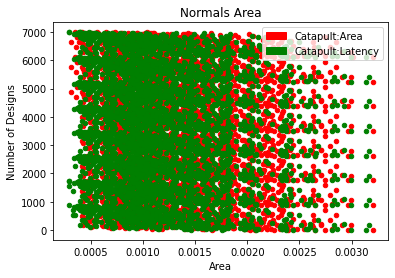

In [5]:
ax1 = vdfx.plot(x='area', y='n', kind='scatter', c='r')
ax = cdfx.plot(x='area', y='n', kind='scatter', c='g', ax=ax1)
#ax1.set_ylim(0,0.016)

red_data = mpatches.Patch(color='red', label='Catapult:Area')
green_data = mpatches.Patch(color='green', label='Catapult:Latency')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Area')
plt.ylabel('Number of Designs')
plt.title("Normals Area")


latency_slices = np.array(cdfx['area'])
vivado_slices = np.array(vdfx['area'])
t2, p2 = stats.ttest_ind(latency_slices,vivado_slices)
D2,P2 = stats.ks_2samp(latency_slices, vivado_slices)
statistic2, critical_value2, p_value2 = stats.anderson_ksamp([latency_slices, vivado_slices])
count = 0
for i in critical_value2:
    if(statistic2 < i):
        count = count + 1
if count == len(critical_value2):
    AD_Obs2 = True
else:
    AD_Obs2 = False
Actual2 = True

In [7]:
x = PrettyTable()
Benchmark = "normals"
Samples1= "Catapult-FPGA--TP"
Samples2 = "Catapult-FPGA--Area"
ttest="ttest"
kstest="KS-test"
adtest="AD-test"
comma = ","
expt1 = ((t1 < 0.5)and(p1>0.1))
expk1=((D1 < 0.5)and(P1>0.1))
expt2 = ((t2 < 0.5)and(p2>0.1))
expk2=((D2 < 0.5)and(P2>0.1))
x.field_names = ["Benchmark", "Samples", "Test", "Statistic", "P-value", "Observation"]
x.add_row([Benchmark, Samples1, ttest, float("{:.6f}".format(t1)), float("{:.6f}".format(p1)), expt1])
x.add_row([Benchmark, Samples1, kstest, float("{:.6f}".format(D1)), float("{:.6f}".format(P1)),expk1])
x.add_row([Benchmark, Samples1, adtest, float("{:.6f}".format(statistic1)), float("{:.6f}".format(p_value1)), AD_Obs1])
x.add_row([Benchmark, Samples2, ttest, float("{:.6f}".format(t2)), float("{:.6f}".format(p2)), expt2])
x.add_row([Benchmark, Samples2, kstest, float("{:.6f}".format(D2)), float("{:.6f}".format(P2)), expk2])
x.add_row([Benchmark, Samples2, adtest, float("{:.6f}".format(statistic2)), float("{:.6f}".format(p_value2)), AD_Obs1])
print(x)
file1=open('../../../GOF/gof.csv','a')
file1.write(Benchmark + comma + Samples1 + comma + ttest + comma + str(float("{:.6f}".format(t1))) + comma + str(float("{:.6f}".format(p1))) + comma + str(expt1) + "\n" )
file1.write(Benchmark + comma + Samples1 + comma + kstest + comma + str(float("{:.6f}".format(D1))) + comma + str(float("{:.6f}".format(P1))) + comma + str(expk1) + "\n" )
file1.write(Benchmark + comma + Samples1 + comma + adtest + comma + str(float("{:.6f}".format(statistic1))) + comma + str(float("{:.6f}".format(p_value1))) + comma + str(AD_Obs1) +  "\n" )
file1.write(Benchmark + comma + Samples2 + comma + ttest + comma + str(float("{:.6f}".format(t2))) + comma + str(float("{:.6f}".format(p2))) + comma + str(expt2) +  "\n" )
file1.write(Benchmark + comma + Samples2 + comma + kstest + comma + str(float("{:.6f}".format(D2))) + comma + str(float("{:.6f}".format(P2))) + comma + str(expk2) +  "\n" )
file1.write(Benchmark + comma + Samples2 + comma + adtest + comma + str(float("{:.6f}".format(statistic2))) + comma + str(float("{:.6f}".format(p_value2))) + comma + str(AD_Obs2) + "\n" )

#passing the test and giving verdict as true if atleast 2 of the tests pass
y = PrettyTable()
v1 = [expt1, expk1, AD_Obs1]
v2 = [expt2, expk2, AD_Obs2]
n1 = 0
n2 = 0
for i in v1:
    if i == True:
        n1 = n1 + 1
if n1 >= 2:
    verdict1 = "Similar Design Spaces"
else:
    verdict1 = "Dissimilar Design Spaces"
    
for i in v2:
    if i == True:
        n2 = n2 + 1
if n2 >= 2:
    verdict2 = "Similar Design Spaces"
else:
    verdict2 = "Dissimilar Design Spaces"
    

y.field_names = ["Benchmark", "Samples", "Verdict"]
y.add_row([Benchmark, Samples1, verdict1])
y.add_row([Benchmark, Samples2, verdict2])
print("Summarising the Results for NOrmals FPGA Catapult Goals Design Space")
print(y)

file2=open('../../../GOF/results.csv','a')
file2.write(Benchmark + comma + Samples1 + comma + str(verdict1) + "\n" )
file2.write(Benchmark + comma + Samples2 + comma + str(verdict2) + "\n" )

+-----------+---------------------+---------+-------------+---------+-------------+
| Benchmark |       Samples       |   Test  |  Statistic  | P-value | Observation |
+-----------+---------------------+---------+-------------+---------+-------------+
|  normals  |  Catapult-FPGA--TP  |  ttest  |  118.202628 |   0.0   |    False    |
|  normals  |  Catapult-FPGA--TP  | KS-test |   0.871717  |   1.0   |    False    |
|  normals  |  Catapult-FPGA--TP  | AD-test | 3706.612266 |  0.001  |    False    |
|  normals  | Catapult-FPGA--Area |  ttest  |  -12.800215 |   0.0   |    False    |
|  normals  | Catapult-FPGA--Area | KS-test |   0.14473   |   1.0   |     True    |
|  normals  | Catapult-FPGA--Area | AD-test |  128.255431 |  0.001  |    False    |
+-----------+---------------------+---------+-------------+---------+-------------+
Summarising the Results for NOrmals FPGA Catapult Goals Design Space
+-----------+---------------------+--------------------------+
| Benchmark |       Samples 

53